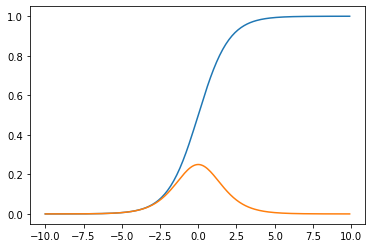

In [180]:
from sigmoid import sigmoid
from sigmoidGradient import sigmoidGradient as sd
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
y_prime = sd(x)

plt.plot(x,y)
plt.plot(x, y_prime)


In [181]:
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

# Randomly select 100 data points to display
sel = np.random.choice(range(X.shape[0]), 100)
sel = X[sel,:]


Loading and Visualizing Data ...


In [182]:
import scipy.io

# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('debugweights.mat');

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

In [183]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [184]:

import numpy as np

print(np.shape(X))
print(np.shape(Theta1))
print(np.shape(Theta2))


(5000, 400)
(25, 401)
(10, 26)


In [185]:
m = np.shape(X)[0]
ones = np.ones([5000,1])

print(m)
print(np.shape(X))
print(np.shape(Theta1))

X_prime = np.c_[ones, X]

print(np.shape(X_prime))
print(np.shape(Theta1))


5000
(5000, 400)
(25, 401)
(5000, 401)
(25, 401)


In [363]:
z_1 = np.dot(Theta1, X_prime[1])
print(np.shape(Theta1))
print(np.shape(z_1))
print(z_1)

(25, 401)
(25,)
[-4.81302157 -2.92257775  2.6445065   0.84862076 -1.07786496  5.6037835
 -1.87875993 -7.28728881  5.87517738 -4.42789819 -1.88126592 -4.08040186
 -3.78767782 -2.27465625 -5.83120172  2.68217055  5.90779391 -1.88126755
 -0.764938    1.3114137  -4.49649948  2.65153177  2.10497303  4.69948787
 -2.76096862]


In [187]:
a_1 = sigmoid(z_1)
print(np.shape(a_1))
print(np.shape(Theta2))
print(a_1)

(25,)
(10, 26)
[8.05782163e-03 5.10486829e-02 9.33671593e-01 7.00277736e-01
 2.53910265e-01 9.96329622e-01 1.32531375e-01 6.83712699e-04
 9.97199568e-01 1.17986869e-02 1.32243535e-01 1.66197870e-02
 2.21465558e-02 9.32437832e-02 2.92596199e-03 9.35966335e-01
 9.97289192e-01 1.32243348e-01 3.17575135e-01 7.87749623e-01
 1.10250452e-02 9.34105338e-01 8.91385592e-01 9.90982126e-01
 5.94701645e-02]


In [188]:
a_1 = np.concatenate((np.array([1,]), a_1), axis=None)
z_2 = np.dot(Theta2, a_1)
print(np.shape(z_2))
print(z_2)

(10,)
[ -7.64327488  -6.02365485  -5.66663594 -10.1126475   -5.02416137
  -6.34107747  -4.44692848  -6.03362019  -6.22762221   5.44411453]


In [189]:
a_2 = sigmoid(z_2)
print(a_2)

[4.79026796e-04 2.41495958e-03 3.44755685e-03 4.05616281e-05
 6.53412433e-03 1.75930169e-03 1.15788527e-02 2.39107046e-03
 1.97025086e-03 9.95696931e-01]


In [190]:
def to_digit(x):
    max = np.argmax(x)
    return max+1

a = np.array([0.9,0.1,0.2,100,0.3,0.4,0.7])
print(to_digit(a))

4


In [191]:
def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

In [192]:
p = softmax(a_2)
print(p)

[0.08523908 0.08540425 0.08549249 0.08520171 0.08575677 0.08534828
 0.08619049 0.08540221 0.08536628 0.23059845]


In [197]:
import numpy as np

from sigmoid import sigmoid

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def digit(x):
    ''' Select highest prob from x and return index'''
    return np.round(np.argmax(x)+1) # Add 1 here because of matlab/python indexing

def predict(Theta1, Theta2, X):
#PREDICT Predict the label of an input given a trained neural network
#   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
#   trained weights of a neural network (Theta1, Theta2)

# Useful values
    m = np.shape(X)[0]              #number of examples

# You need to return the following variables correctly 
    p = np.zeros(m);

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned neural network. You should set p to a 
#               vector containing labels between 1 to num_labels.
#

    # Add bias to X
    ones = np.ones([m,1])
    X = np.c_[ones,X]

    for i in range(m):
        z_1 = np.dot(Theta1, X[i])
        a_1 = sigmoid(z_1)
    
        # Add bias to a_1
        a_1 = np.concatenate((np.array([1,]), a_1), axis=None)
        z_2 = np.dot(Theta2, a_1)
        a_2 = sigmoid(z_2)  
     
        y_hat = softmax(a_2)
        p[i] = digit(y_hat)

    return p

# =========================================================================

##################################################################
# No idea why, but this won't work when it's in the .py file ... #
##################################################################


In [198]:
pred = predict(Theta1, Theta2, X);

(array([507., 494., 491., 499., 506., 504., 496., 502., 496., 505.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

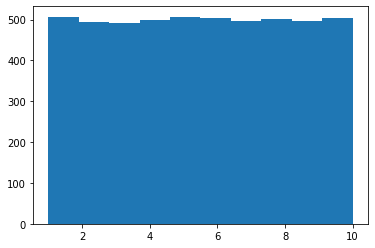

In [199]:
plt.hist(pred)

In [201]:
L_out = 10
L_in = 26

In [224]:
B = np.random.rand(L_out, L_in)
A = np.ones((L_in,1))

C = np.hstack((A, np.atleast_2d(B).T)).T
C = C.T
print(np.shape(C))
print(C)

(26, 11)
[[1.         0.67875752 0.77916275 0.76116062 0.51053377 0.47339587
  0.64241438 0.7304936  0.13556941 0.23091683 0.07607612]
 [1.         0.10138643 0.306838   0.37363895 0.88967813 0.9488949
  0.47939252 0.62460914 0.45465326 0.9421281  0.91452991]
 [1.         0.84183245 0.86235011 0.94904697 0.4594582  0.53694116
  0.70544023 0.0079242  0.51279412 0.49584099 0.14635611]
 [1.         0.33821335 0.97209365 0.22476903 0.74325122 0.24478735
  0.66327193 0.40125612 0.93566053 0.48284793 0.04793201]
 [1.         0.7182834  0.83061096 0.78950771 0.86319796 0.90299788
  0.31221153 0.24214897 0.01315097 0.3858885  0.0241315 ]
 [1.         0.99503304 0.03506339 0.41107467 0.78957181 0.17630515
  0.85720981 0.44028449 0.67038835 0.1929127  0.63686775]
 [1.         0.83576048 0.93300261 0.37788239 0.36822222 0.69439622
  0.97778206 0.41702616 0.37475135 0.49050854 0.82897703]
 [1.         0.6866948  0.70672896 0.85116154 0.98221059 0.9399734
  0.52454348 0.80136871 0.95841921 0.345240

In [226]:
from randInitializeWeights import randInitializeWeights

randInitializeWeights(5,5)

TypeError: randInitializeWeights() takes 2 positional arguments but 3 were given

In [229]:
L_out = 10
L_in = 26

e_init = np.sqrt(6)/np.sqrt(L_out + L_in)
rand = e_init * np.random.rand(L_out, L_in)
print(rand)

[[3.82898490e-01 2.54174656e-01 9.76554545e-02 2.18935750e-01
  2.59778250e-01 1.12386994e-01 3.59219147e-01 4.75740342e-02
  2.26804818e-02 3.14322793e-01 1.69789195e-01 3.31234405e-02
  9.62878616e-02 3.07504036e-02 7.65296543e-02 2.82026253e-01
  3.02095166e-02 2.32708383e-02 1.17366937e-01 3.06148671e-01
  2.03745377e-01 1.05971090e-01 2.84352900e-01 2.74748618e-01
  3.09665072e-01 3.98648280e-01]
 [2.11014943e-01 5.39439625e-02 7.43390823e-02 1.47308256e-02
  3.01085185e-01 2.01819429e-01 2.15930740e-04 3.48551478e-01
  2.75439390e-01 3.29668410e-02 1.88497850e-01 3.25449438e-01
  1.98504780e-01 7.80559943e-02 4.35807008e-02 3.10130714e-01
  3.12254644e-01 1.37829380e-01 3.98398137e-01 6.89876319e-03
  6.96948027e-02 3.78384115e-01 2.16277789e-01 2.67686203e-01
  2.48325479e-01 1.41502003e-01]
 [4.07909909e-01 3.00927295e-01 1.98091912e-01 4.78467137e-02
  1.26022704e-01 4.55098240e-02 4.85898110e-02 2.25746199e-01
  2.08553985e-02 1.73976994e-01 2.23766477e-01 3.53020796e-01
  2.

In [636]:
import numpy as np
from sigmoid import sigmoid
from sigmoidGradient import sigmoidGradient

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def digit(x):
    ''' Select highest prob from x and return index'''
    return np.round(np.argmax(x)+1) # Add 1 here because of matlab/python indexing

def one_hot(i, max):
    ''' return a vector of size max where the entry i is 1'''
    v = np.zeros([max,])
    v[i-1] = 1
    return v

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_value):
#   NNCOSTFUNCTION Implements the neural network cost function for a two layer
#   neural network which performs classification
#   nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_value)
#   computes the cost and gradient of the neural network. The
#   parameters for the neural network are "unrolled" into the vector
#   nn_params and need to be converted back into the weight matrices. 
# 
#   The returned parameter grad should be a "unrolled" vector of the
#   partial derivatives of the neural network.
#

# Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
# for our 2 layer neural network
    tmp = nn_params.copy()
    Theta1 = np.reshape(tmp[0:hidden_layer_size * (input_layer_size + 1)],
                          (hidden_layer_size, (input_layer_size + 1)), order='F')
    Theta2 = np.reshape(tmp[(hidden_layer_size * (input_layer_size + 1)):len(tmp)],
                          (num_labels, (hidden_layer_size + 1)), order='F')

# Setup some useful variables
    m = np.shape(X)[0]

# Computation of the Cost function including regularisation
# Feedforward 
    a_2 = sigmoid(np.dot(np.hstack((np.ones((m, 1)), X)), np.transpose(Theta1)))
    a_3 = sigmoid(np.dot(np.hstack((np.ones((m, 1)), a_2)), np.transpose(Theta2)))

    # Cost function for Logistic Regression summed over all output nodes
    Cost = np.empty((num_labels, 1))
    for k in range(num_labels):
        # which examples fit this label
        y_binary=(y==k+1)
        # select all predictions for label k
        hk=a_3[:,k]
        # compute two parts of cost function for all examples for node k
        Cost[k][0] = np.sum(np.transpose(y_binary)*np.log(hk)) + np.sum(((1-np.transpose(y_binary))*np.log(1-hk)))

# Sum over all labels and average over examples
    J_no_regularisation = -1./m * sum(Cost)
# No regularization over intercept
    Theta1_no_intercept = Theta1[:, 1:]
    Theta2_no_intercept = Theta2[:, 1:]

# Sum all parameters squared
    RegSum1 = np.sum(np.sum(np.power(Theta1_no_intercept, 2)))
    RegSum2 = np.sum(np.sum(np.power(Theta2_no_intercept, 2)))
# Add regularisation term to final cost
    J = J_no_regularisation + (lambda_value/(2*m)) * (RegSum1+RegSum2)

# You need to return the following variables correctly 
    Theta1_grad = np.zeros(np.shape(Theta1))
    Theta2_grad = np.zeros(np.shape(Theta2))

# ====================== YOUR CODE HERE ======================
# Implement the backpropagation algorithm to compute the gradients
# Theta1_grad and Theta2_grad. You should return the partial derivatives of
# the cost function with respect to Theta1 and Theta2 in Theta1_grad and
# Theta2_grad, respectively. After implementing Part 2, you can check
# that your implementation is correct by running checkNNGradients
#
# Note: The vector y passed into the function is a vector of labels
#       containing values from 1..K. You need to map this vector into a 
#       binary vector of 1's and 0's to be used with the neural network
#       cost function.
#
# Hint: It is recommended implementing backpropagation using a for-loop
#       over the training examples if you are implementing it for the 
#       first time.
    
    ones = np.ones([m,1])
    X = np.c_[ones,X]
                   
    for i in range(m):
        
        a_0 = X[i]
        z_1 = np.dot(Theta1, a_0)       
        a_1 = sigmoid(z_1)
        a_1 = np.concatenate((np.array([1,]), a_1), axis=None)
        z_2 = np.dot(Theta2, a_1)
        a_2 = sigmoid(z_2)  
        y_hat = digit(softmax(a_2))
            
        d_2 = a_2 - one_hot(y[i], np.shape(a_2)[0])
        
        A = sigmoidGradient(z_1)
        B = np.dot(Theta2[:, 1:].T, d_2)
        d_1 = np.multiply(A, B)

        d_2 = d_2.reshape((np.shape(d_2)[0], 1))
        a_1 = a_1.reshape((np.shape(a_1)[0], 1))
        Theta2_grad += np.dot(d_2, a_1.T)
        
        d_1 = d_1.reshape((np.shape(d_1)[0], 1))
        a_0 = a_0.reshape((np.shape(a_0)[0], 1))
        
        print(str(np.shape(a_0.T)) + str(a_0.T))
        print(str(np.shape(d_1)) + str(d_1))
        
        Theta1_grad += np.dot(d_1, a_0.T)

    Theta1_grad = Theta1_grad/m
    Theta2_grad = Theta2_grad/m
    
    Theta1_grad[:,1:] += (lambda_value/m) * Theta1{:}

# =========================================================================

# Unroll gradients
    Theta1_grad = np.reshape(Theta1_grad, Theta1_grad.size, order='F')
    Theta2_grad = np.reshape(Theta2_grad, Theta2_grad.size, order='F')
    grad = np.expand_dims(np.hstack((Theta1_grad, Theta2_grad)), axis=1)

    return J, grad


In [637]:
import numpy as np
from debugInitializeWeights import debugInitializeWeights
#from nnCostFunction import nnCostFunction
from computeNumericalGradient import computeNumericalGradient

def checkNNGradients(lambda_value=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

# We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
# Reusing debugInitializeWeights to generate X
    X  = debugInitializeWeights(m, input_layer_size - 1)
    y  = 1 + np.transpose(np.mod(range(1, m+1), num_labels))
#    y=np.expand_dims(y,axis=1)


# Unroll parameters
    Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
    Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

    nn_params = np.hstack((Theta1_1d, Theta2_1d))

# Short hand for cost function
    costFunc = lambda p : nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_value)

    cost, grad = costFunc(nn_params)
    numgrad = computeNumericalGradient(costFunc, np.expand_dims(nn_params, axis=1))


# Visually examine the two gradient computations.  The two columns
# you get should be very similar. 
    print(numgrad, grad)
    print('The above two columns you get should be very similar.\n (Left-Numerical Gradient, Right-(Your) Analytical Gradient)\n\n')

# Evaluate the norm of the difference between two solutions.  
# If you have a correct implementation, and assuming you used EPSILON = 0.0001 
# in computeNumericalGradient.m, then diff below should be less than 1e-9
    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
    print('If your backpropagation implementation is correct, then \n the relative difference will be small (less than 1e-9). \n \nRelative Difference: ', diff)


In [638]:
checkNNGradients()

(1, 4)[[ 1.          0.0841471  -0.02794155 -0.09999902]]
(5, 1)[[-0.00148808]
 [ 0.001481  ]
 [-0.00144962]
 [ 0.0013835 ]
 [-0.0012894 ]]
(1, 4)[[ 1.          0.09092974  0.06569866 -0.05365729]]
(5, 1)[[-0.01845201]
 [ 0.01587805]
 [-0.01303268]
 [ 0.00988282]
 [-0.00653687]]
(1, 4)[[1.         0.014112   0.09893582 0.0420167 ]]
(5, 1)[[-0.0065332 ]
 [ 0.00977553]
 [-0.01284565]
 [ 0.01562741]
 [-0.0180941 ]]
(1, 4)[[ 1.         -0.07568025  0.04121185  0.09906074]]
(5, 1)[[-0.00148324]
 [ 0.00147754]
 [-0.00144396]
 [ 0.00137759]
 [-0.00128526]]
(1, 4)[[ 1.         -0.09589243 -0.05440211  0.06502878]]
(5, 1)[[-0.01843472]
 [ 0.01588349]
 [-0.01302863]
 [ 0.00986935]
 [-0.0065343 ]]
(1, 4)[[ 1.          0.0841471  -0.02794155 -0.09999902]]
(5, 1)[[-0.00148811]
 [ 0.00148102]
 [-0.00144964]
 [ 0.00138352]
 [-0.00128942]]
(1, 4)[[ 1.          0.09092974  0.06569866 -0.05365729]]
(5, 1)[[-0.01845211]
 [ 0.01587807]
 [-0.01303271]
 [ 0.00988284]
 [-0.00653689]]
(1, 4)[[1.         0.014